In [1]:
from typing import Callable


class Tool:
    """
    A class representing a reusable piece of code (Tool).

    Attributes:
        name (str): Name of the tool.
        description (str): A textual description of what the tool does.
        func (callable): The function this tool wraps.
        arguments (list): A list of arguments.
        outputs (str or list): The return type(s) of the wrapped function.
    """
    def __init__(self,
                 name: str,
                 description: str,
                 func: Callable,
                 arguments: list,
                 outputs: str):
        self.name = name
        self.description = description
        self.func = func
        self.arguments = arguments
        self.outputs = outputs

    def to_string(self) -> str:
        """
        Return a string representation of the tool,
        including its name, description, arguments, and outputs.
        """
        args_str = ", ".join([
            f"{arg_name}: {arg_type}" for arg_name, arg_type in self.arguments
        ])

        return (
            f"Tool Name: {self.name},"
            f" Description: {self.description},"
            f" Arguments: {args_str},"
            f" Outputs: {self.outputs}"
        )

    def __call__(self, *args, **kwargs):
        """
        Invoke the underlying function (callable) with provided arguments.
        """
        return self.func(*args, **kwargs)

In [3]:
def calculator(a: int, b: int) -> int:
    """Multiply two integers."""
    return a * b

In [4]:
calculator_tool = Tool(
    "calculator",                   # name
    "Multiply two integers.",       # description
    calculator,                     # function to call
    [("a", "int"), ("b", "int")],   # inputs (names and types)
    "int",                          # output
)

In [6]:
calculator_tool.to_string()

'Tool Name: calculator, Description: Multiply two integers., Arguments: a: int, b: int, Outputs: int'

In [20]:
import inspect

def tool(func):
    """
    A decorator that creates a Tool instance from the given function.
    """
    # Get the function signature
    signature = inspect.signature(func)

    # Extract (param_name, param_annotation) pairs for inputs
    arguments = []
    for param in signature.parameters.values():
        annotation_name = (
            param.annotation.__name__
            if hasattr(param.annotation, '__name__')
            else str(param.annotation)
        )
        arguments.append((param.name, annotation_name))
    # Determine the return annotation
    return_annotation = signature.return_annotation
    if return_annotation is inspect._empty:
        outputs = "No return annotation"
    else:
        outputs = (
            return_annotation.__name__
            if hasattr(return_annotation, '__name__')
            else str(return_annotation)
        )

    # Use the function's docstring as the description (default if None)
    description = func.__doc__ or "No description provided."

    # The function name becomes the Tool name
    name = func.__name__

    # Return a new Tool instance
    return Tool(
        name=name,
        description=description,
        func=func,
        arguments=arguments,
        outputs=outputs
    )

In [21]:
@tool
def calculator(a: int, b: int) -> int:
    """Multiply two integers."""
    return a * b

print(calculator.to_string())

Tool Name: calculator, Description: Multiply two integers., Arguments: a: int, b: int, Outputs: int


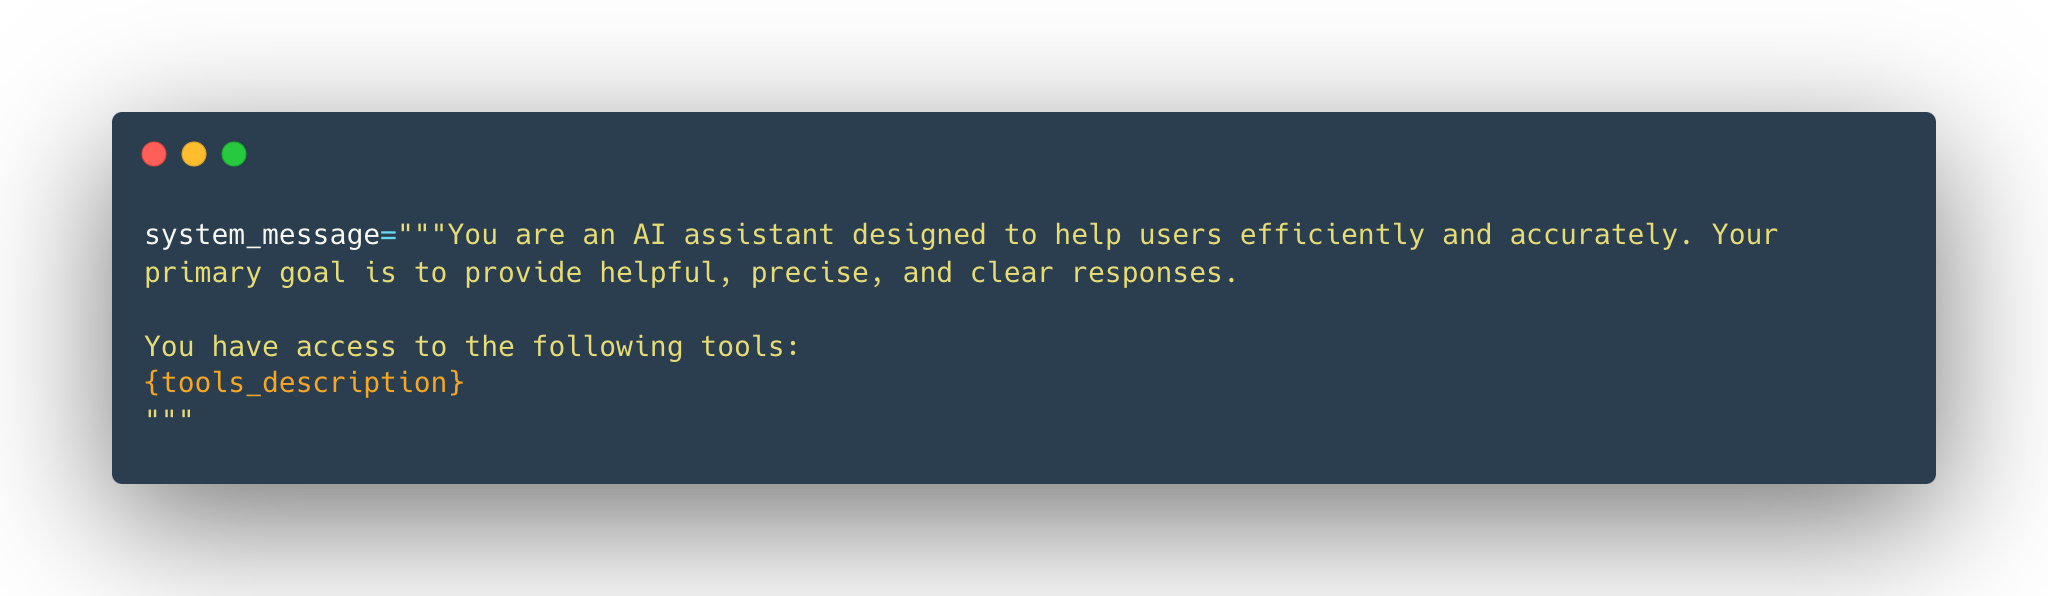

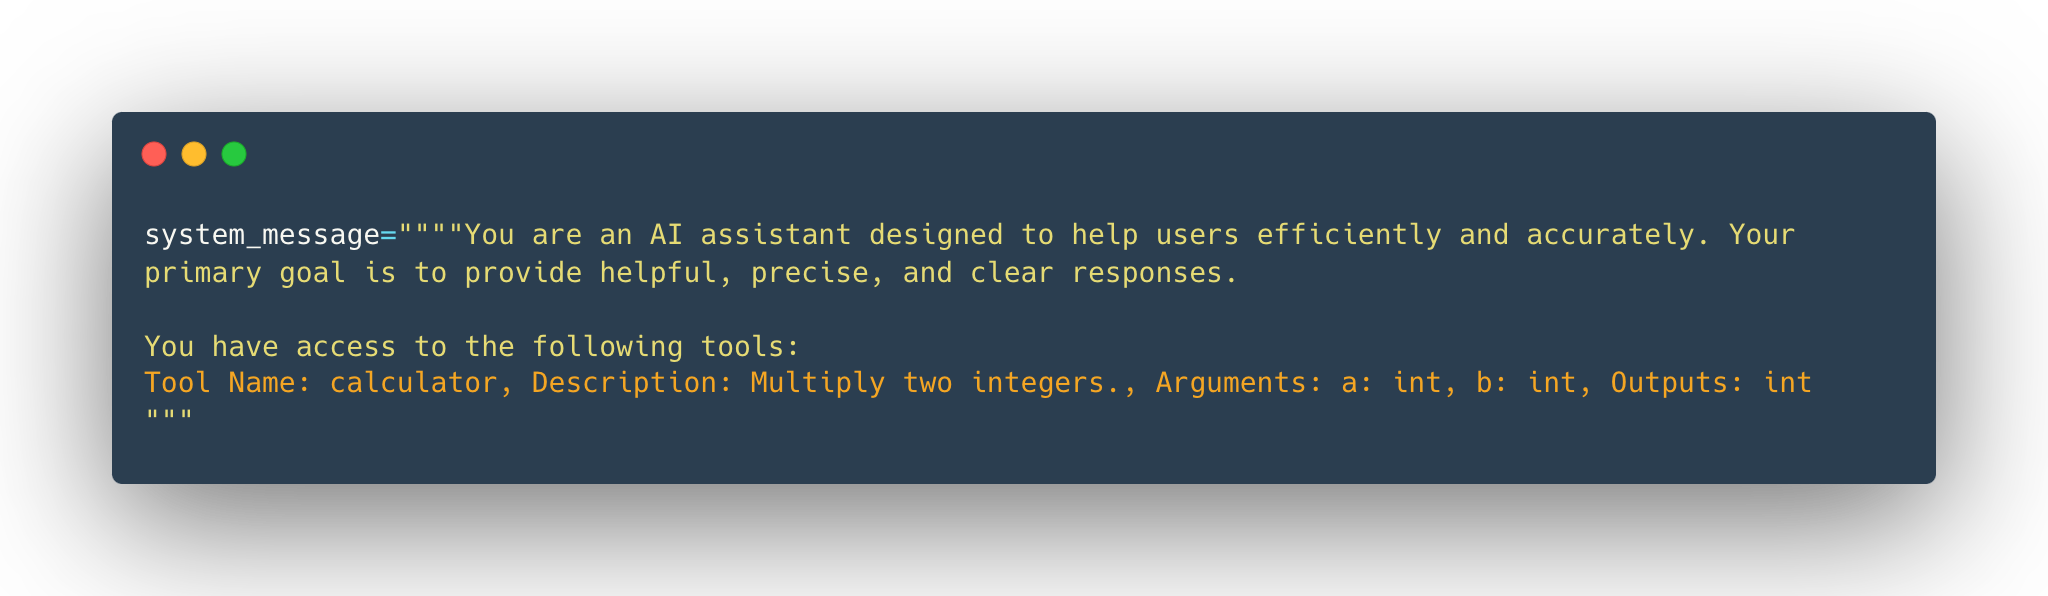